# PISA with w version which evaluated individually without Normalization
## Revision Version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


## Data preprocessing

In [3]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [4]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [5]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [6]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [7]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
print("Each student's Answer Rates: ", stud_AR)
print("Answer Rates for each Items: ", prob_AR)

Each student's Answer Rates:  0       0.812500
3       0.687500
5       0.647059
6       0.555556
7       0.733333
          ...   
6642    0.625000
6646    0.333333
6647    0.823529
6648    0.272727
6649    0.470588
Length: 2727, dtype: float64
Answer Rates for each Items:  CM033Q01S    0.817402
CM474Q01S    0.783784
CM155Q01S    0.794776
CM155Q04S    0.565594
CM411Q01S    0.564557
CM411Q02S    0.523632
CM803Q01S    0.340050
CM442Q02S    0.440568
CM034Q01S    0.441250
CM305Q01S    0.427689
CM496Q01S    0.533742
CM496Q02S    0.760652
CM423Q01S    0.818627
CM192Q01S    0.527881
CM603Q01S    0.350311
CM571Q01S    0.530075
CM564Q01S    0.613776
CM564Q02S    0.466830
CM447Q01S    0.853301
CM273Q01S    0.478528
CM408Q01S    0.411980
CM420Q01S    0.278388
CM446Q01S    0.819427
CM559Q01S    0.766871
CM828Q03S    0.161111
CM464Q01S    0.450932
CM800Q01S    0.963370
CM982Q01S    0.798017
CM982Q02S    0.489362
CM982Q03S    0.692308
CM982Q04S    0.562035
CM992Q01S    0.788875
CM992Q02S    0.29343

In [8]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [9]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_np = fil4.to_numpy()
print(num_np)

# 극과 극은 통하니까 함께 사라져!
scarub_np = np.where(num_np == 1, 0.99, num_np)
scourge_np = np.where(scarub_np == 0, 0.01, scarub_np)
num_df = scourge_np                                     # df가 전혀 아니지만, 일단 족보 꼬이니까 df라고 칩시다.
print(num_df)
num_realdf = pd.DataFrame(num_df)                       # 레알 df임을 강조 (추후 filna(0) 하는데 사용됨)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]
2727 51


In [10]:
# 개인 정답률 weight default값 도입
w_np = np.ones((columns,1))    # 세로로 길쭉한 모양
w_df = pd.DataFrame(w_np)      # NaN값 처리하는 데는 DataFrame
num_dfdf = pd.DataFrame(num_df)

# 개인 정답률 도출(가로합) -> '초과정답률'로 정정
p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

p_noN = num_dfdf.fillna(0)
p_noN_np = p_noN.to_numpy()
p_reduct = np.dot(p_noN_np, w_np)

p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태

print("각 학생 정답률")
print(row_prob)

# 각 문항 당 정답률 도출(세로합)
num_sm = num_dfdf.mean(axis=0)
col_prob_1 = num_sm.to_numpy()
col_prob = np.array([col_prob_1])
print("각 문제 정답률")
print(col_prob)

각 학생 정답률
[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
각 문제 정답률
[[0.81105392 0.77810811 0.7888806  0.56428218 0.56326582 0.5231592
  0.34324937 0.44175711 0.442425   0.42913473 0.53306748 0.7554386
  0.8122549  0.52732342 0.35330435 0.52947368 0.61150062 0.46749386
  0.84623472 0.47895706 0.41374083 0.28282051 0.81303861 0.76153374
  0.16788889 0.45191304 0.95410256 0.792057   0.48957447 0.68846154
  0.56079404 0.78309735 0.29756757 0.67605528 0.81984334 0.58085
  0.85674907 0.57376989 0.43053165 0.80356098 0.696      0.12755051
  0.45841328 0.80275434 0.84894869 0.304      0.79097686 0.30194406
  0.63641698 0.21303426 0.61801047]]


In [11]:
print(row_prob)

# 개인 능력치 theta 도출
theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta
print(theta)

[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
[[ 1.4258252 ]
 [ 0.77105931]
 [ 0.59328118]
 ...
 [ 1.49654643]
 [-0.95803034]
 [-0.11542209]]


In [12]:
# 문항 난이도 beta 도출
beta0 = np.log(col_prob/(1-col_prob))
#print(beta0)
#print(np.mean(beta0))
beta = np.mean(beta0) - beta0
print(beta)

[[-1.06592356 -0.86372587 -0.9272418   0.1323897   0.13652236  0.29824616
   1.03979649  0.62498327  0.62227537  0.67633159  0.25848602 -0.73688278
  -1.07377972  0.28154664  0.99549523  0.27291773 -0.06267506  0.52115753
  -1.31442017  0.47517084  0.7394715   1.32146298 -1.07892713 -0.77015735
   1.9916129   0.58389348 -2.64341261 -0.94642005  0.43265748 -0.40198734
   0.14656404 -0.89285904  1.24985721 -0.34475264 -1.12433717  0.06468561
  -1.39759794  0.09370025  0.67063169 -1.01775169 -0.43737265  2.31374167
   0.55768136 -1.01264949 -1.33542983  1.21927127 -0.93987446  1.2290068
  -0.168897    1.69768104 -0.09016289]]


In [13]:
# 문항 변별도 alpha prior
alpha = np.ones((1,columns))
print(alpha)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


In [14]:
# 각 성분별 P값 도출 (실험군)
ex_prob = np.exp(alpha * (theta - beta))/(1+np.exp(alpha * (theta - beta)))
#print(ex_prob)

In [15]:
# Learning Rate 설정
A = 0.00025

In [16]:
# 결측치 반영한 P 행렬 도출 (실험군)
ex_prob_real = ex_prob.copy()

for n in range(ex_prob.shape[0]):
    for m in range(ex_prob.shape[1]):
        if np.isnan(num_df[n][m]):
            ex_prob_real[n][m] = np.nan
            
print(ex_prob_real)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.71909083        nan 0.70291595]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.84096737 0.44988518 0.83015262]
 [       nan        nan        nan ... 0.31235479        nan 0.29569824]
 [0.72121602 0.67880899 0.69249714 ...        nan        nan        nan]]


In [17]:
ex_prob_pd = pd.DataFrame(ex_prob_real)
print(ex_prob_pd)

            0         1         2         3         4         5         6   \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2722       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2723  0.595738  0.546253  0.561945  0.307768  0.306888  0.273601  0.152131   
2724       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2725       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2726  0.721216  0.678809  0.692497  0.438362  0.437345  0.398033  0.239537   

            7         8         9   ...        41        42    

In [18]:
# Kullbeck Leibler Divergence값 도출

# 각 사람이 각 문제에 대한 KLD 도출
KLD_indiv = num_df * np.log(num_df / ex_prob_real) + (1 - num_df) * np.log((1 - num_df) / (1 - ex_prob_real))
print(KLD_indiv)

# NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
KLD_indiv_df = pd.DataFrame(KLD_indiv)
KLD_NaNga_df = KLD_indiv_df.fillna(0)
KLD_NaNga_np = KLD_NaNga_df.to_numpy()
print(KLD_NaNga_np)

# KLD 최초도출
KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)
print(KLD_TotalSum_np)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.28316563        nan 0.30512865]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.13385532 0.54363808 0.14601127]
 [       nan        nan        nan ... 1.09972272        nan 0.30322551]
 [1.2118115  0.33889701 0.31956784 ...        nan        nan        nan]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.28316563 0.         0.30512865]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.13385532 0.54363808 0.14601127]
 [0.         0.         0.         ... 1.09972272 0.         0.30322551]
 [1.2118115  0.33889701 0.31956784 ... 0.         0.         0.        ]]
17039.31084167619


## Real NDG Process

In [19]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = fil4.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [20]:
# '필수요소' 점검 탭
# 학생 정답률 구하는 함수
def answer_rate(w_let):                # w_let은 np 형식

    # 개인 정답률 도출(가로합)
    p_pre = num_realdf.copy()
    p_noN = p_pre.fillna(0)
    p_noN_np = p_noN.to_numpy()
    w_np = w_let.copy()
    p_reduct = np.dot(p_noN_np, w_np)  # 세로로 사람 수만큼 서있는 형태

    p_1 = fil4.notnull().sum(1)
    p_2 = p_1.to_numpy()
    p_solT = np.reshape(p_2, (rows, 1))

    row_prob = p_reduct / p_solT

    # 혹시나 모르니까 보험차원에서 걸어둔 장치
    scarub = np.where(row_prob > 0.99, 0.99, row_prob)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    row_result = scourge
    
    return row_result

In [21]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# theta_let, beta_let, alpha_let은 np
def expect_model(alpha_let, beta_let, theta_let):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_neg = alpha_let * (beta_let - theta_let)
    before_nan = 1/ (1 + np.exp(exponet_neg))
    after_nan = before_nan.copy()
    
    # 순진한 모델값에 구멍 뚫어버리기
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
    
    model_result = after_nan
    
    return model_result                              # numpy 형태로 return


In [22]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, beta_let, theta_let):
    
    p_imu = expect_model(alpha_let, beta_let, theta_let)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                   # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu   # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태

In [23]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    expo = theta_let - beta_let                                         # matrix 하나 생성 (numpy 형태)
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = expo * common_unit                                   # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [24]:
# beta값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_beta(alpha_let, beta_let, theta_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, beta_let, theta_let)                    # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * alpha_let * common_unit                                    # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_betak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    beta_med = beta_let - A * delta_betak                                            # Gradient Descent 방식으로 D_KL의 beta 업데이트
    beta_result = beta_med - np.mean(beta_med)
    
    # 결과값은 np 형태로 추출
    return beta_result

In [25]:
# w값 갱신하는 함수
# theta_let, beta_let, alpha_let, w_let은 np
def set_w(w_let, alpha_let, beta_let, theta_let):
    
    # theta 건들기 전에 할 수 있는 미분 chain
    p_1 = fil4.notnull().sum(1)
    p_2 = p_1.to_numpy()
    N_mu = np.reshape(p_2, (rows, 1))
    M_df = num_realdf.fillna(0)           # 문항 X 인원 정답여부 표를 행렬처럼 취급 (정답은 0.99, 오답은 0.01, NaN은 0)
    M = M_df.to_numpy()                   # '사람 X 문항' matrix
    
    P_indiv = answer_rate(w_let)    # 사람 수만큼 세로로 서있는 형태의 vector
    P_indiv_deriv = M / N_mu        # 2D numpy matrix 형태
    theta_indiv_deriv = 1 / (P_indiv * (1 - P_indiv)) * P_indiv_deriv        # 2D numpy matrix 형태: '사람 X 문항' 형태 -> theta 미분한 부분에 갖다 붙일 미분 chain

    theta_indiv_deriv_list = theta_indiv_deriv.tolist()                      # 2D numpy matrix를 2D List로 변환
    
    # '공통부분' 끌올 (밑재료 준비)
    common_unit_pt = preprocess_diff(alpha_let, beta_let, theta_let)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # '공통부분' 끌올 (요리 시작)
    common_unit_np = alpha_let * common_unit_pt
    
    commonu_df = pd.DataFrame(common_unit_np)                          # fillna 처리하기 위한 DataFrame 임시도입
    commonu_fna = commonu_df.fillna(0)                                 # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    common_unit_np2 = commonu_fna.to_numpy()
        
    common_unit_T = np.transpose(common_unit_np2)                      # '문항 X 사람' 형태로 변환
    common_unit = common_unit_T.tolist()                               # 2D List로 변환

    P_hat_list = []                                                    # 3D Tensor 담을 list 생성 (3D Tensor라니... 무섭군요..!!)
    P_hat_2D = []                                                      # 2D Tensor 일부분을 담을 list 생성
    
    for i in range(columns):
        for j in range(rows):
            carrier = common_unit_T[i, j] * theta_indiv_deriv[j, :]
            P_hat_2D.append(carrier)
        P_hat_list.append(P_hat_2D)     # 3D Tensor로 재조합하기 위해 P_hat_list를 채운 모습
        P_hat_2D = []                   # P_hat_2D를 재활용 하기 위해 내용물을 비운 모습
        
    P_hat_np = np.array(P_hat_list)                                     # 3D Tensor로 완성된 모습 (여기서 k는 냅두고, i와 mu를 모두 더해서 없애야 함) (이때 0은 i, 1은 mu, 2는 k)
    #P_hat_np_sum = P_hat_np.sum(axis=1)                                 # '사람' 축을 기준으로 summation + 2D matrix로 다시 전환 -> '문항 X 문항' 형태 
        
    # KLD Gradient Discent
    KLD_GD_pre = P_hat_np.sum(axis=1, keepdims=False)                               # 3D Tensor는 극혐이므로, 여기선 keepdims를 하지 않는다. (3D -> 2D)
    KLD_GD_preT = KLD_GD_pre.sum(axis=0, keepdims=True)                             # 세로 정렬 벡터지만, w가 keepdims 했으므로, 일단 dims 유지 (가로합: i 소멸)
    KLD_GD = np.transpose(KLD_GD_preT)                                                # return 형태 맞춰서 다시 정렬 (세로로 서있는 형태)
    
    
    # Final Gradient Descendent: update
    w_result = w_let - A * KLD_GD                                       # Normalization 삭제
    
    # 결과값은 np 형태로 추출
    return w_result                                                     # 세로로 서있는 형태로 return

In [26]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta(w_let):
    
    P_mu_sum = answer_rate(w_let)                         # 세로 형태로 도출
    theta_result = np.log((P_mu_sum)/(1 - P_mu_sum))
    
    # 결과값은 np 형태로 추출
    return theta_result

In [27]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, beta_let, theta_let):
    
    P_imu = expect_model(alpha_let, beta_let, theta_let)
    Q_imu = num_df.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [28]:
alpha_test = alpha.copy()
beta_test = beta.copy()
w_test = w_np.copy()
theta_test = theta.copy()
KLD_test = KLD_TotalSum_np.copy()

In [29]:
# 본격 Iteration 굴리는 파트
limit = 1500
for k in range(limit):
    # alpha값 갱신
    alpha_carrier = set_alpha(alpha_test, beta_test, theta_test)
    alpha_test = alpha_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # beta값 갱신
    beta_carrier = set_beta(alpha_test, beta_test, theta_test)
    beta_test = beta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)
    
    # w값 갱신
    w_carrier = set_w(w_test, alpha_test, beta_test, theta_test)
    w_test = w_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # theta값 갱신
    theta_carrier = set_theta(w_test)
    theta_test = theta_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha_test, beta_test, theta_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha 값 = ", alpha_test)
        print("최종 Beta 값 = ", beta_test)
        print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta 값 = ", theta_test)
        break

1 번째 Kullback-Leibler Divergence 값 =  16968.58449552433
2 번째 Kullback-Leibler Divergence 값 =  16922.66047245531
3 번째 Kullback-Leibler Divergence 값 =  16887.11164361468
4 번째 Kullback-Leibler Divergence 값 =  16856.33496724983
5 번째 Kullback-Leibler Divergence 값 =  16828.534182080733
6 번째 Kullback-Leibler Divergence 값 =  16803.064308540936
7 번째 Kullback-Leibler Divergence 값 =  16779.610843252798
8 번째 Kullback-Leibler Divergence 값 =  16757.9486102703
9 번째 Kullback-Leibler Divergence 값 =  16737.889715378915
10 번째 Kullback-Leibler Divergence 값 =  16719.268594547342
11 번째 Kullback-Leibler Divergence 값 =  16701.943453444495
12 번째 Kullback-Leibler Divergence 값 =  16685.79400000897
13 번째 Kullback-Leibler Divergence 값 =  16670.706881826525
14 번째 Kullback-Leibler Divergence 값 =  16656.582273688902
15 번째 Kullback-Leibler Divergence 값 =  16643.331317085867
16 번째 Kullback-Leibler Divergence 값 =  16630.874728054325
17 번째 Kullback-Leibler Divergence 값 =  16619.141623463183
18 번째 Kullback-Leibler Diverge

In [30]:
# Plotting 실시
alpha_1 = alpha_test.astype(float)
beta_1 = beta_test.astype(float)
x1 = np.transpose(theta_test)
x2 = x1.reshape(-1,)
x = x2.astype(float)
#print(x)

In [33]:
Y_bar = pd.DataFrame(num_df)
Y_bar = Y_bar.transpose()
x_bar = pd.DataFrame(x)
x_bar = x_bar.transpose()

#ex_prob_realiz = expect_realization(ex_prob, num_df)
#print(ex_prob_realiz)

P_bar = pd.DataFrame(expect_model(alpha_test, beta_test, theta_test))
P_bar = P_bar.transpose()
DataSet = pd.concat([x_bar, P_bar, Y_bar])
DataSet = DataSet.transpose()
DataSet_np = DataSet.to_numpy()
DataSet_reset = pd.DataFrame(DataSet_np)
#print(DataSet.iloc[:, 0:5])
#print(DataSet_reset)
print(DataSet_reset[0])
#print(DataSet.shape)


0       1.574330
1       0.936264
2       0.823292
3       0.120626
4       1.119561
          ...   
2722    0.659388
2723   -1.016862
2724    1.334566
2725   -1.517458
2726   -0.138902
Name: 0, Length: 2727, dtype: float64


In [34]:
print(DataSet_reset.columns)

RangeIndex(start=0, stop=103, step=1)


### Two thetas extraction

In [38]:
Data_carrier = pd.read_csv("Theta_no_w.csv")
print(Data_carrier)

      Unnamed: 0         0
0              0  1.299397
1              1  0.763097
2              2  0.633763
3              3  0.185202
4              4  1.086299
...          ...       ...
2722        2722  0.648547
2723        2723 -0.880626
2724        2724  1.230501
2725        2725 -1.144621
2726        2726  0.171085

[2727 rows x 2 columns]


In [46]:
#print(Data_carrier.iloc[:, 1])
Data_carrier2 = Data_carrier.iloc[:, 1]
Data_native = DataSet_reset.iloc[:, 0]

In [48]:
Data_two_thetas = pd.concat([Data_native, Data_carrier2], axis=1)
print(Data_two_thetas)

             0         0
0     1.574330  1.299397
1     0.936264  0.763097
2     0.823292  0.633763
3     0.120626  0.185202
4     1.119561  1.086299
...        ...       ...
2722  0.659388  0.648547
2723 -1.016862 -0.880626
2724  1.334566  1.230501
2725 -1.517458 -1.144621
2726 -0.138902  0.171085

[2727 rows x 2 columns]


### Now, it's time to plot for each problem

In [35]:
DataSet_Test = DataSet_reset.sort_values(0, ascending = True)
print(DataSet_Test)

          0         1         2         3         4         5         6    \
514  -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
1717 -4.59512  0.085284  0.104354  0.004410  0.005768  0.005464  0.026629   
2678 -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
1868 -4.59512       NaN  0.104354       NaN  0.005768       NaN  0.026629   
2043 -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
...       ...       ...       ...       ...       ...       ...       ...   
803   4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
2629  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
1381  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
846   4.59512  0.995056  0.989849  0.999765  0.994227  0.994016  0.965342   
369   4.59512       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...   93    94    95    96    97    98 

In [36]:
DataSet = DataSet_Test.reset_index(drop=True)
print(DataSet)

          0         1         2         3         4         5         6    \
0    -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
1    -4.59512  0.085284  0.104354  0.004410  0.005768  0.005464  0.026629   
2    -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
3    -4.59512       NaN  0.104354       NaN  0.005768       NaN  0.026629   
4    -4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
...       ...       ...       ...       ...       ...       ...       ...   
2722  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
2723  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
2724  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   
2725  4.59512  0.995056  0.989849  0.999765  0.994227  0.994016  0.965342   
2726  4.59512       NaN       NaN       NaN       NaN       NaN       NaN   

           7         8         9    ...   93    94    95    96    97    98 

In [37]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


In [38]:
Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)
print(rough)

            0         6     57
1    -4.595120  0.026629  0.01
3    -4.595120  0.026629  0.01
17   -3.667458  0.052169  0.01
20   -3.140366  0.075685  0.01
28   -3.002577  0.083277  0.01
...        ...       ...   ...
2706  4.595120  0.965342  0.99
2709  4.595120  0.965342  0.99
2716  4.595120  0.965342  0.99
2719  4.595120  0.965342  0.99
2725  4.595120  0.965342  0.99

[804 rows x 3 columns]


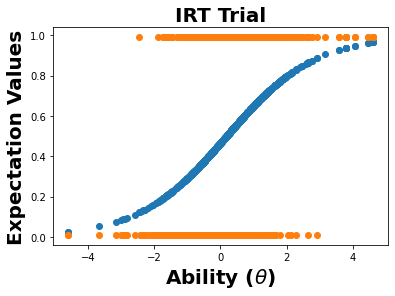

In [39]:
# Plotting Trial

Tough = DataSet[[0, 6, 57]]
rough = Tough.dropna(axis=0)

xs = rough[0].tolist()    # Theta Column
#print(xs)
ys = rough[6].tolist()    # CM411Q02S Column
#print(ys)
zs = rough[57].tolist()   # CM411Q02S Real df Column

plt.scatter(x=xs, y=ys)
plt.scatter(x=xs, y=zs)

plt.title('IRT Trial', fontdict={'weight': 'bold', 'size': 20})
plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
plt.show()

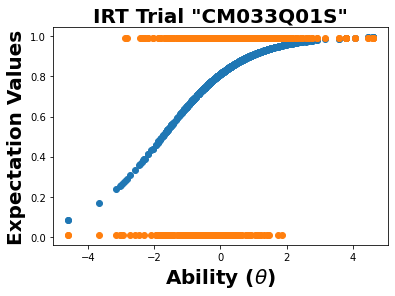

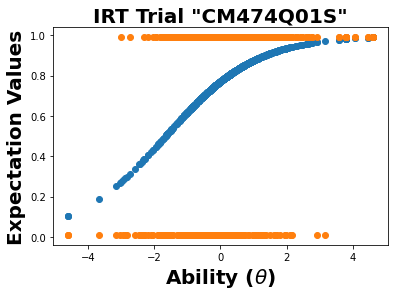

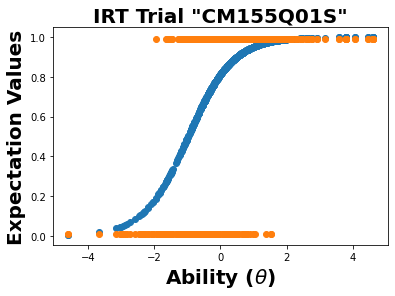

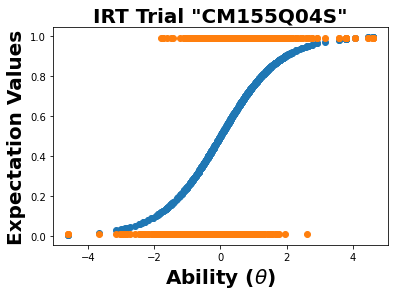

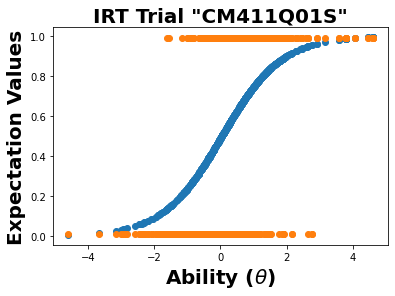

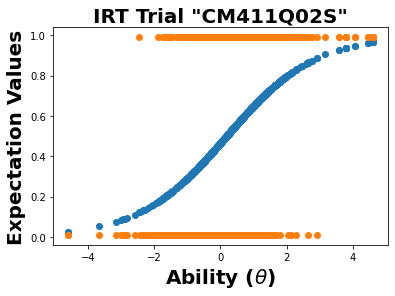

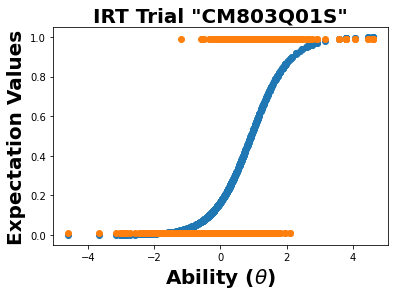

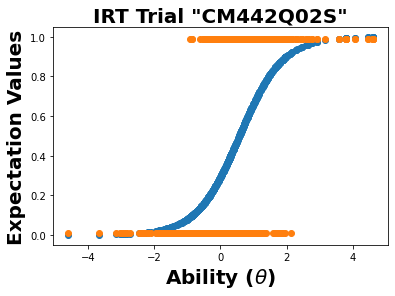

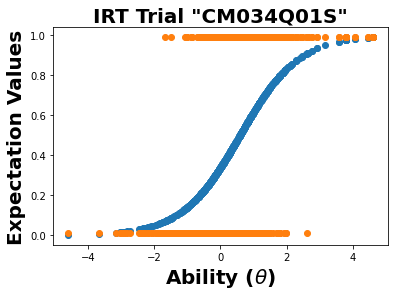

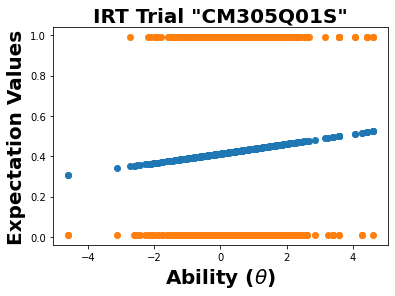

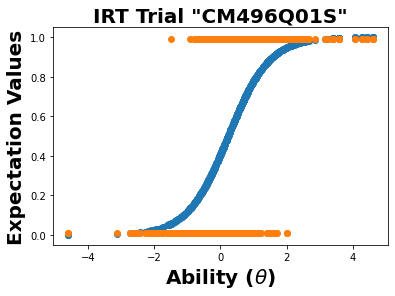

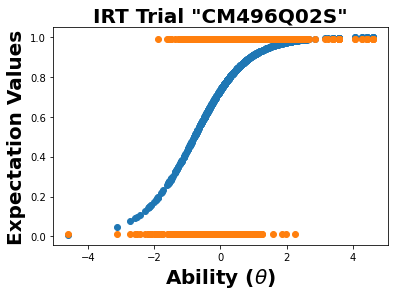

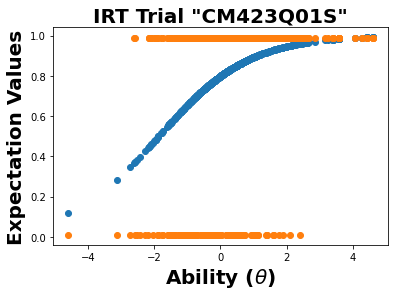

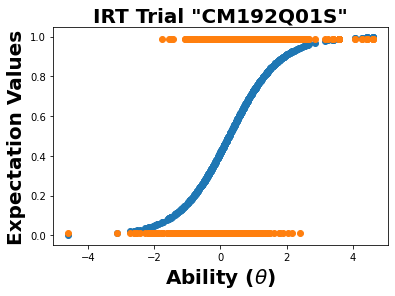

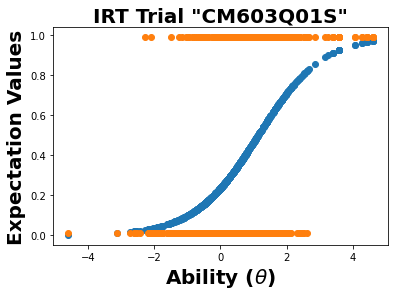

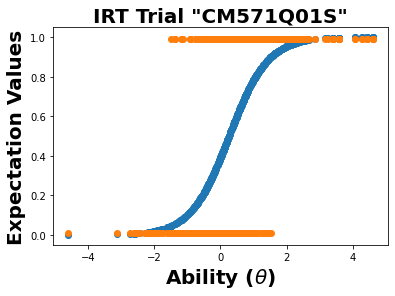

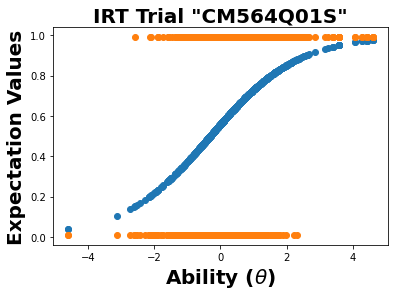

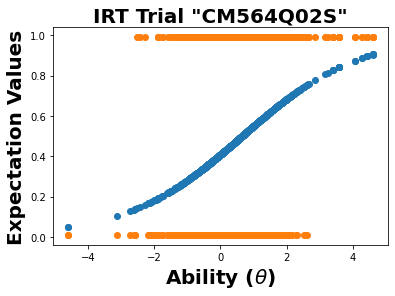

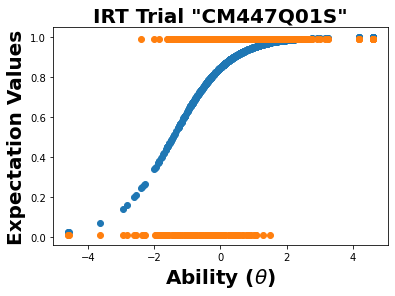

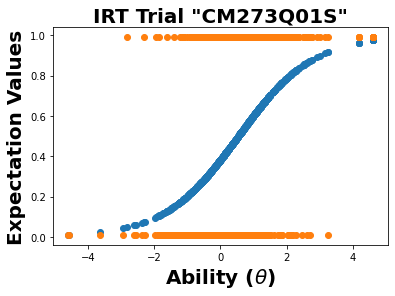

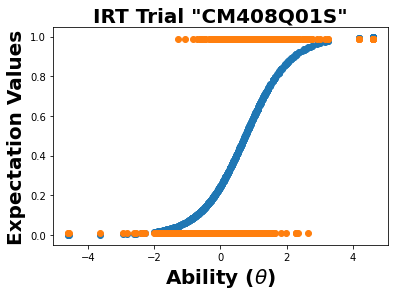

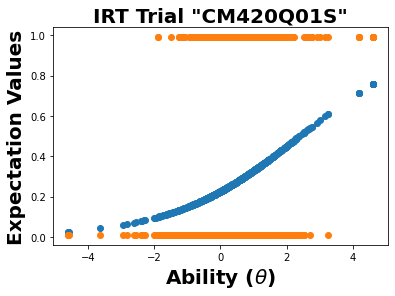

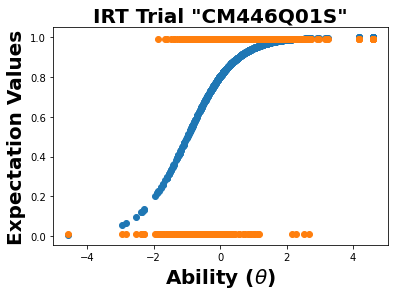

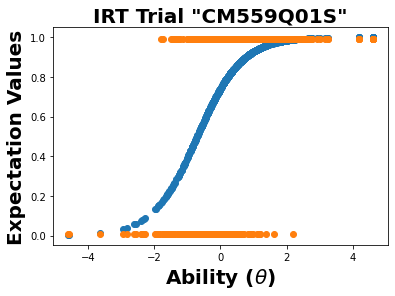

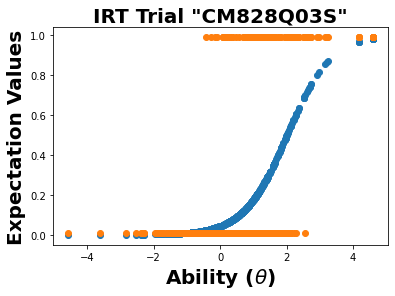

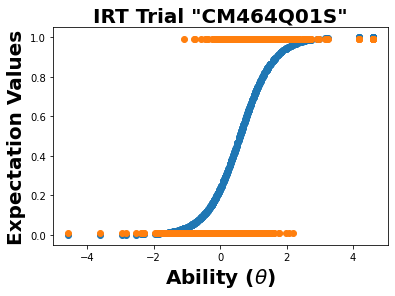

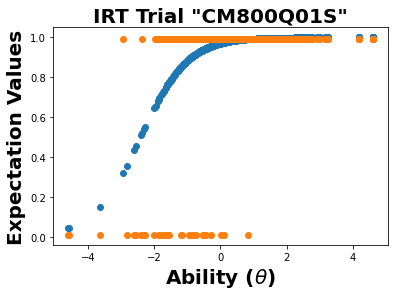

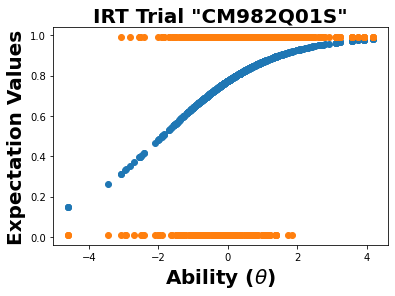

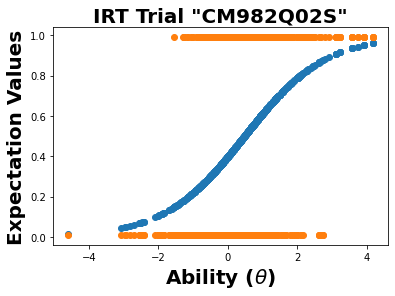

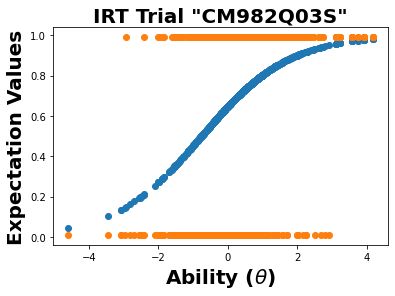

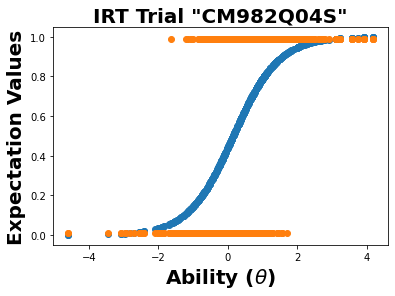

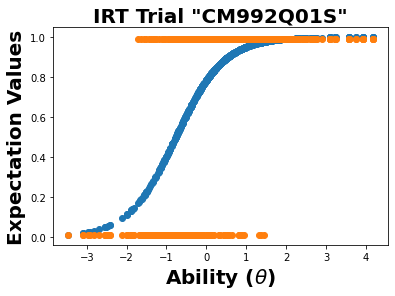

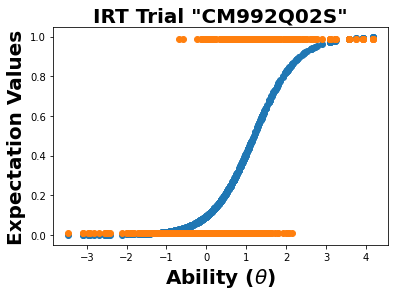

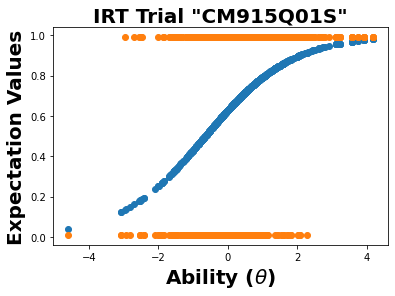

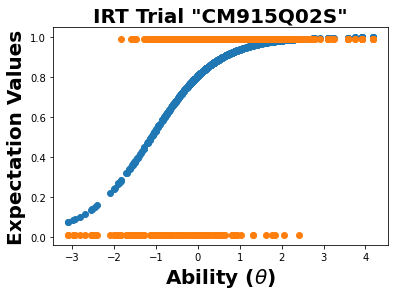

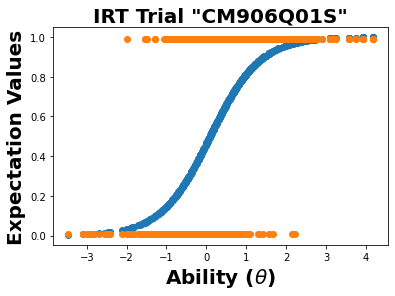

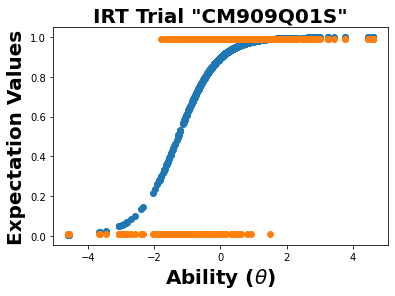

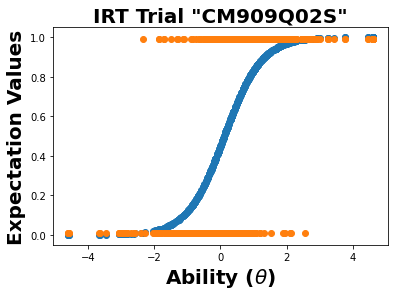

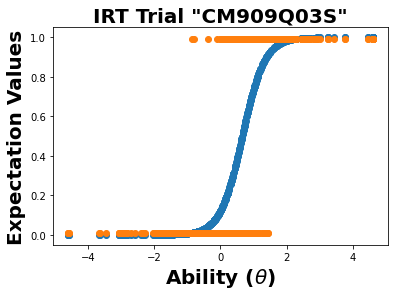

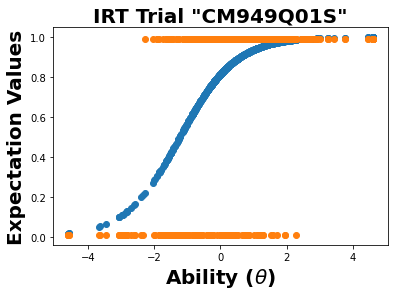

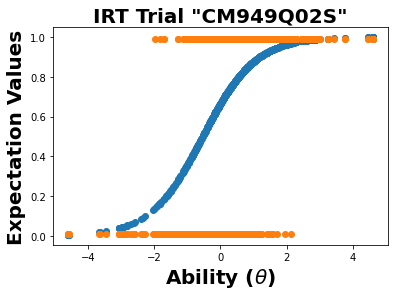

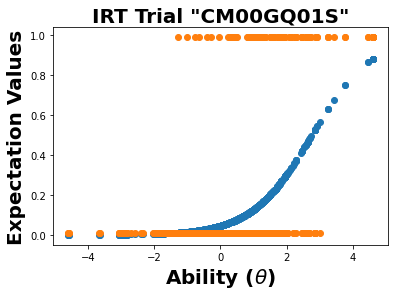

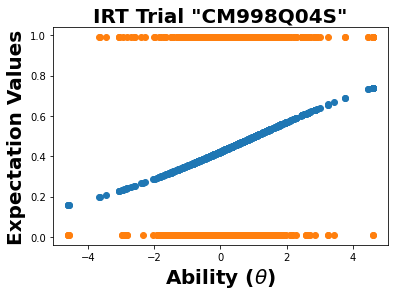

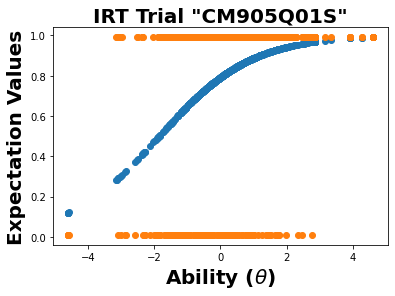

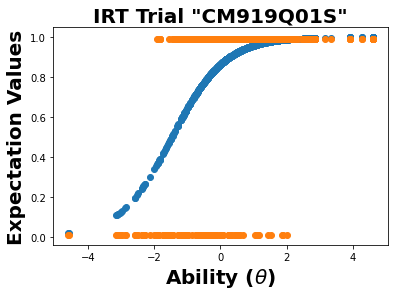

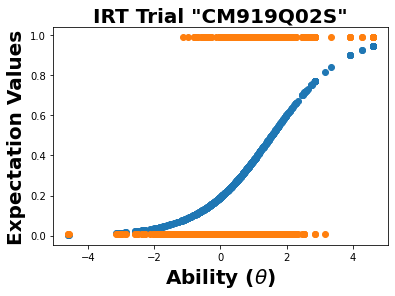

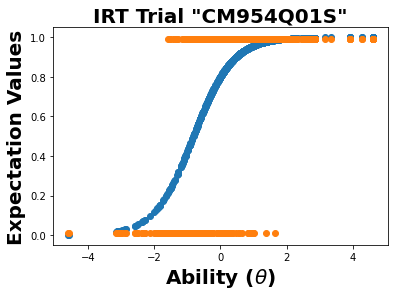

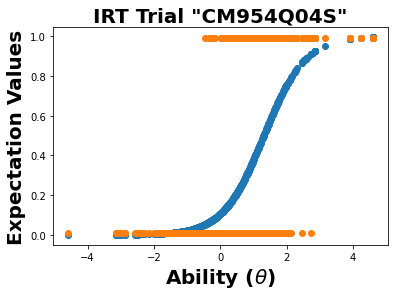

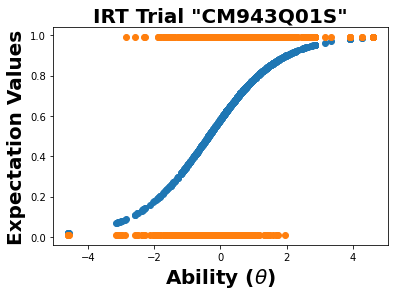

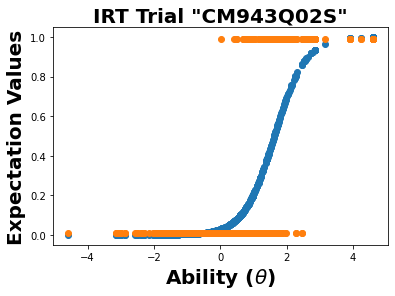

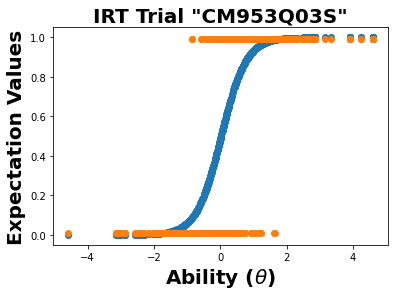

In [40]:
# Plotting Trial Multi Columns

xs = DataSet[0].tolist()
#print(xs)

for n in range(columcolum.shape[0]):
    Tough_in = DataSet[[0, n+1, n+52]]
    rough_in = Tough_in.dropna(axis=0)
    
    xs = rough_in[0].tolist()
    ys = rough_in[n+1].tolist()
    zs = rough_in[n+52].tolist()
    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)
    
    plt.title('IRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()


In [41]:
alpha_2 = alpha_1.tolist()
#print(alpha_2)
print(alpha_2[0][1])
rank = 1
print(alpha_2[0][rank])
beta_2 = beta_1.tolist()
print(beta_2[0][2])

0.732267960679967
0.732267960679967
-0.9800063864816302


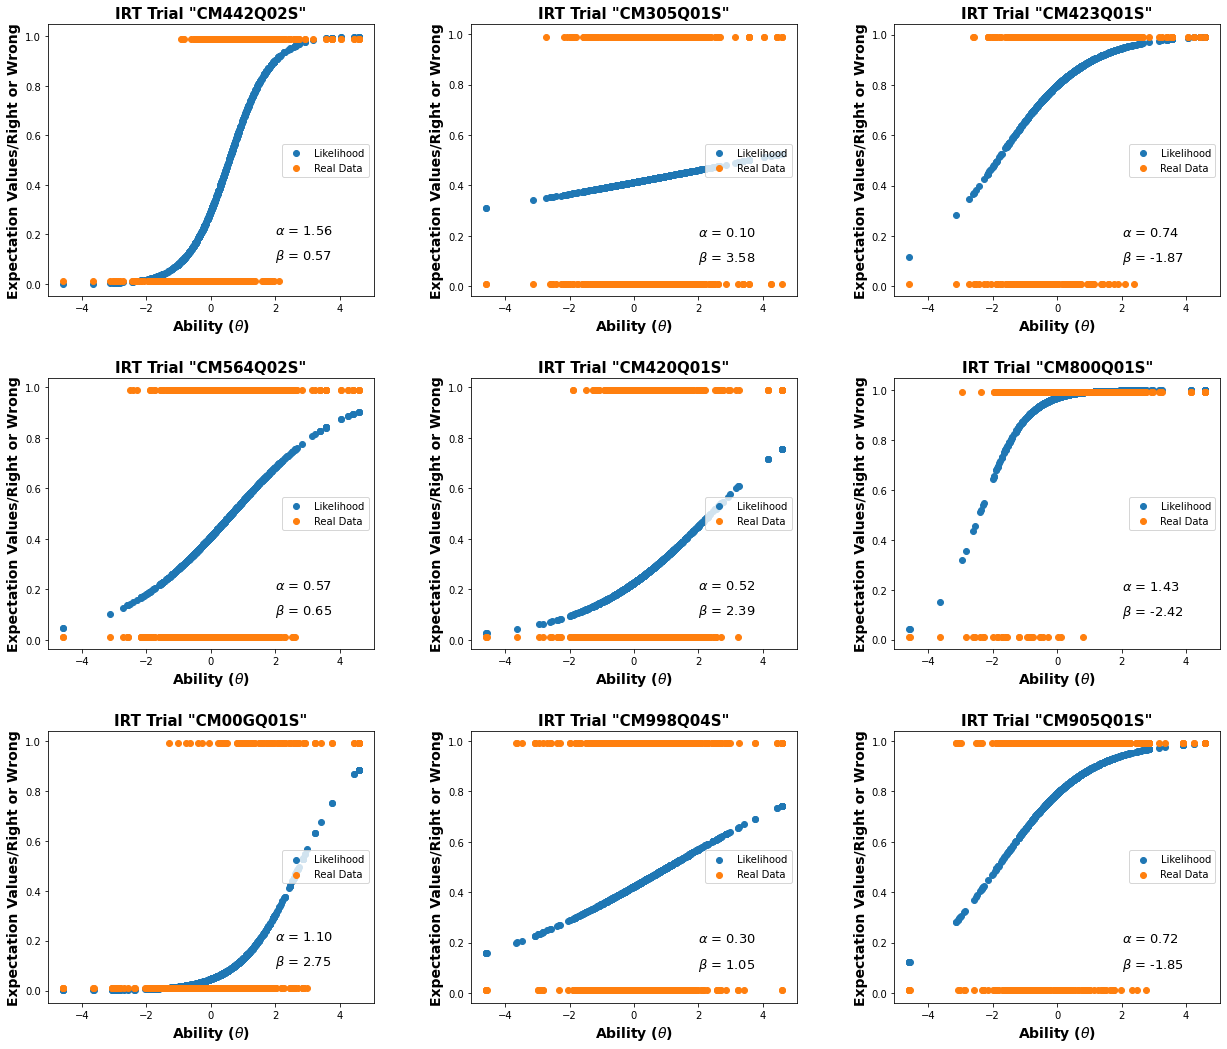

In [42]:
# 선별된 문항들 집중 분석 (likelihood 방식으로 잘된 것 1개, 찌그러진거 8개)

f, axes = plt.subplots(3, 3)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((21, 18))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 선택받은 문항 번호
Liszt = [8, 10, 13, 18, 22, 27, 42, 43, 44]
    
for n in Liszt:
    Tough_fin = DataSet[[0, n, n+51]]
    rough_fin = Tough_fin.dropna(axis=0)
    rank = n - 1
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n].tolist()
    zs = rough_fin[n+51].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('IRT Trial "%s"' %columcolum[n-1], fontdict={'weight': 'bold', 'size': 15})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 14})
    axes[garo, sero].set_ylabel('Expectation Values/Right or Wrong', fontdict={'weight': 'bold', 'size': 14})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 13)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 13)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 3
    sero = sero % 3


plt.show()

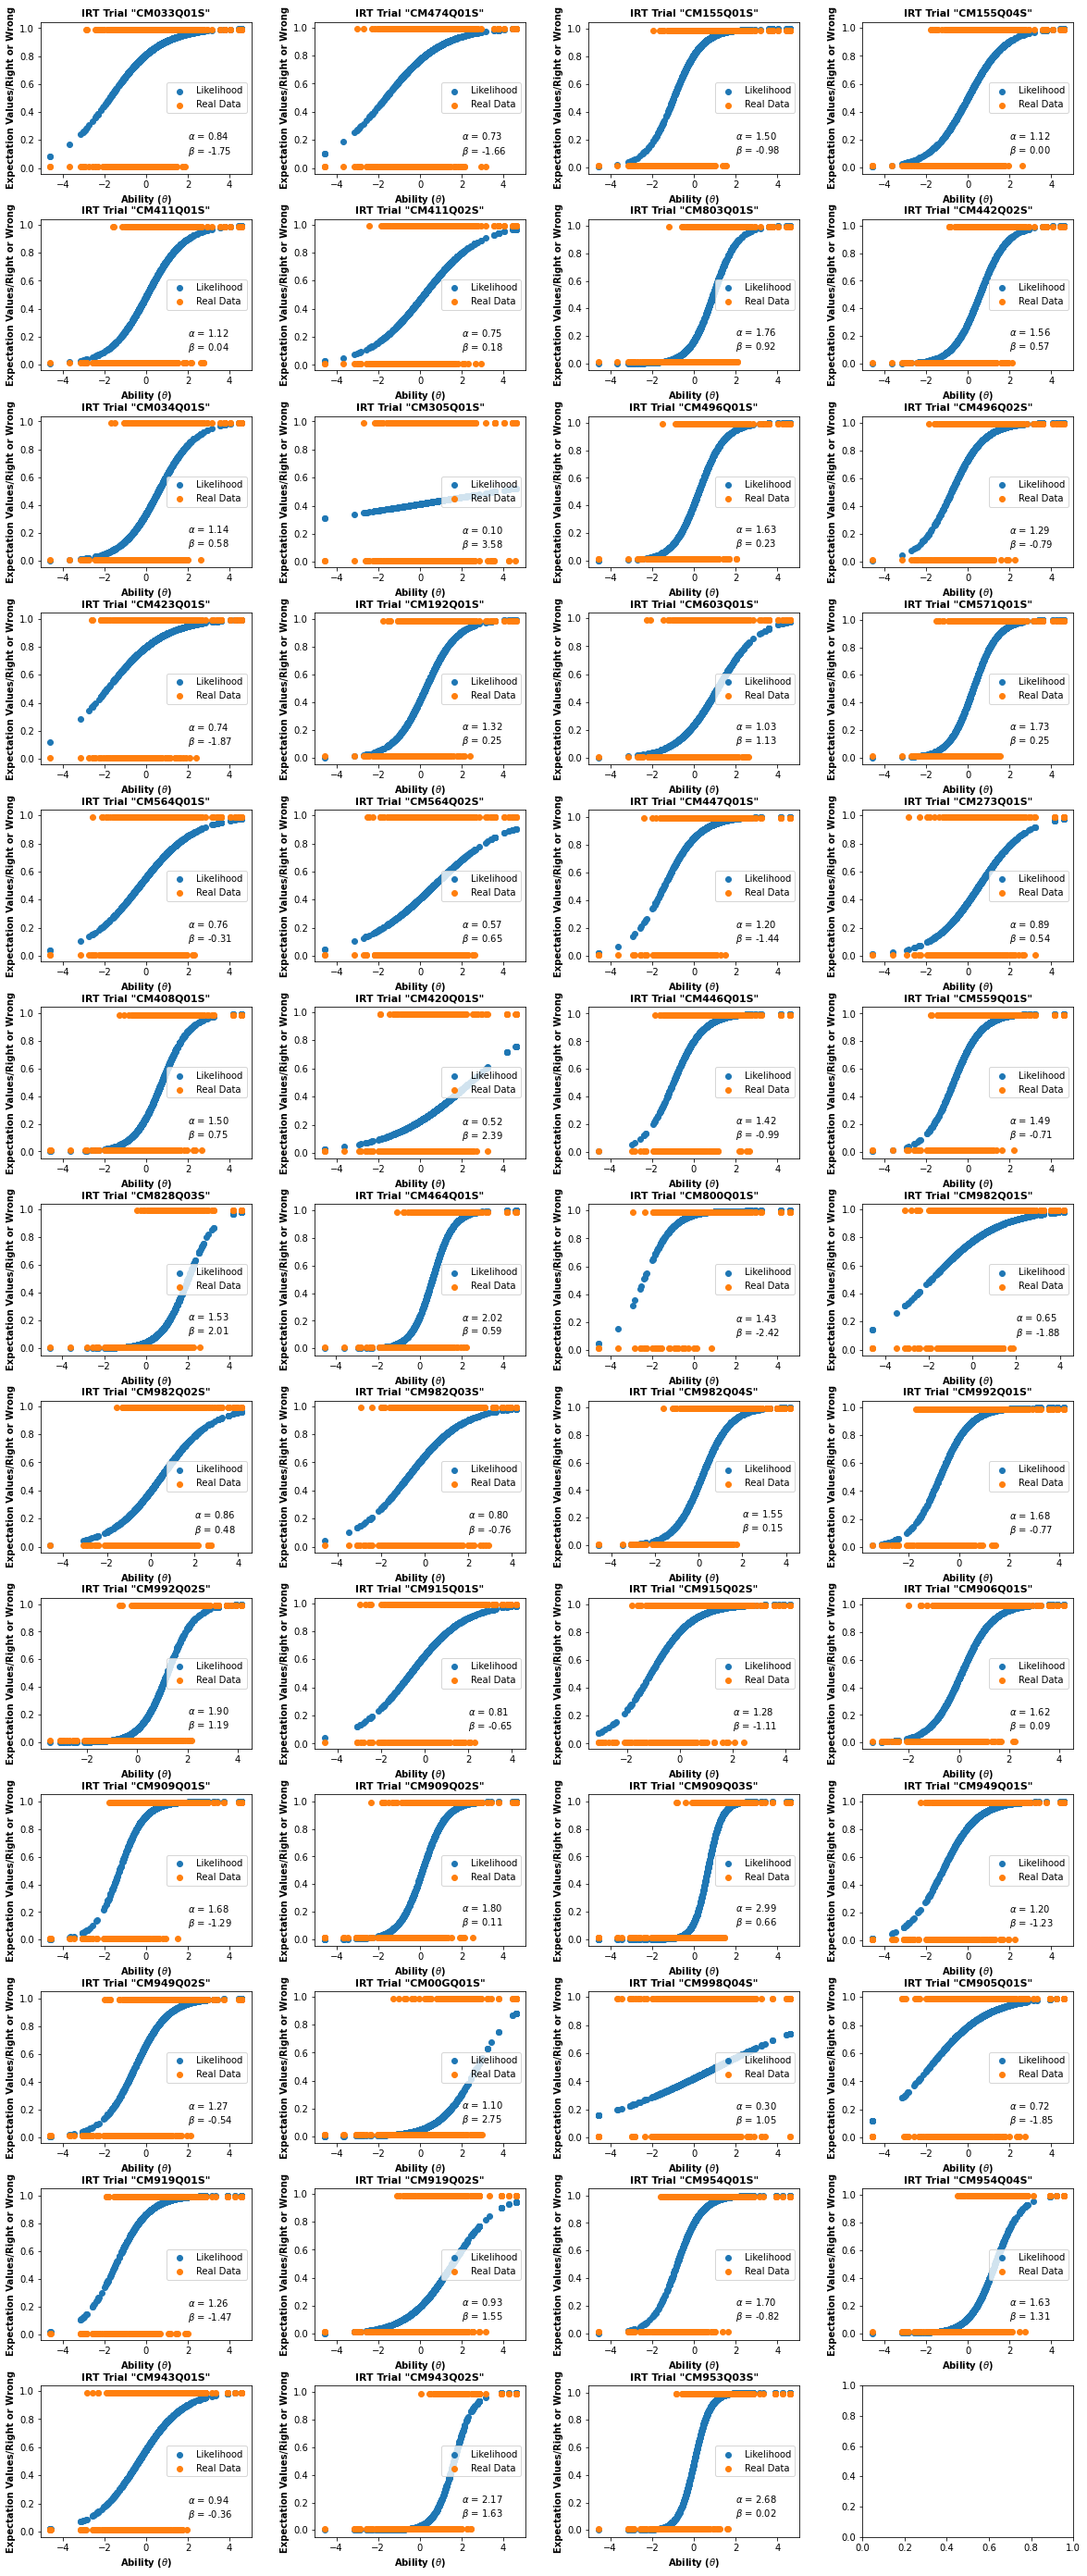

In [43]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for n in range(columcolum.shape[0]):
    Tough_fin = DataSet[[0, n+1, n+52]]
    rough_fin = Tough_fin.dropna(axis=0)
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n+1].tolist()
    zs = rough_fin[n+52].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('IRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values/Right or Wrong', fontdict={'weight': 'bold', 'size': 10})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 10)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 10)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4
    rank += 1


plt.show()

In [44]:
alpha_given = pd.read_csv("alpha_LLH.csv")
print(alpha_given)

   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.867762  0.760318  1.474832  1.183268  1.162131  0.791843   

          6         7         8  ...        41        42        43        44  \
0  2.134036  1.737991  1.227131  ...  1.364727  0.397955  0.788604  1.462591   

         45        46        47        48        49       50  
0  1.173064  2.008299  2.266966  1.052638  4.394977  4.40255  

[1 rows x 52 columns]


In [45]:
alpha_given_np = alpha_given.to_numpy()
print(alpha_given_np)

[[0.         0.86776156 0.76031788 1.47483164 1.18326835 1.16213118
  0.79184316 2.13403589 1.73799141 1.22713135 0.23739721 1.77817802
  1.29162022 0.70401757 1.39360318 1.14301926 1.93343658 0.77174787
  0.59612199 1.33204323 0.96843646 1.64767913 0.62176509 1.48655807
  1.5865448  2.11859663 2.17575241 2.52807673 0.70152564 0.90382973
  0.83647074 1.66032059 1.94300112 2.02680215 0.85282893 1.45082253
  1.79848715 2.19634927 2.53557957 7.47099204 1.42219341 1.55246785
  1.36472674 0.39795495 0.78860353 1.46259065 1.17306406 2.00829906
  2.26696612 1.05263783 4.39497709 4.40255023]]


In [46]:
alpha_trial = alpha_given_np[:,1:]
print(alpha_trial)

[[0.86776156 0.76031788 1.47483164 1.18326835 1.16213118 0.79184316
  2.13403589 1.73799141 1.22713135 0.23739721 1.77817802 1.29162022
  0.70401757 1.39360318 1.14301926 1.93343658 0.77174787 0.59612199
  1.33204323 0.96843646 1.64767913 0.62176509 1.48655807 1.5865448
  2.11859663 2.17575241 2.52807673 0.70152564 0.90382973 0.83647074
  1.66032059 1.94300112 2.02680215 0.85282893 1.45082253 1.79848715
  2.19634927 2.53557957 7.47099204 1.42219341 1.55246785 1.36472674
  0.39795495 0.78860353 1.46259065 1.17306406 2.00829906 2.26696612
  1.05263783 4.39497709 4.40255023]]


In [47]:
# 일단 엑셀 저장할 땐 transpose한 상태로 저장

w_test_T = np.transpose(w_test)
print(w_test_T)
theta_test_T = np.transpose(theta_test)
print(theta_test_T)

[[0.74891177 0.64697532 1.35063258 0.93812941 1.01098492 0.64070572
  1.37502155 1.24349687 0.9325153  0.18890776 1.47282669 1.32918068
  0.85633868 1.23298963 0.95793467 1.58140368 0.80368601 0.56067314
  0.88320241 0.74070395 1.20633058 0.4189517  1.18723188 1.22227441
  1.21098707 1.63825123 0.69457611 0.51937914 0.71855753 0.66945599
  1.20287107 1.30573479 1.47107174 0.63297208 0.95296037 1.23031021
  1.22992183 1.18557201 1.76134384 0.85037798 0.9059647  0.91074471
  0.2436062  0.54572109 1.0220073  0.65899684 1.22288593 1.00445072
  0.67681312 1.2780232  1.72643394]]
[[ 1.49115351  0.8943529   0.77189063 ...  1.26977063 -1.47632113
  -0.15139299]]


In [48]:
print(alpha_trial.shape)
print(alpha_trial.shape[1])

(1, 51)
51


In [50]:
alpha_trial_df = pd.DataFrame(alpha_test)
alpha_trial_df.to_csv("alpha_0.005.csv")
beta_trial_df = pd.DataFrame(beta_test)
beta_trial_df.to_csv("beta_0.005.csv")
w_test_T_df = pd.DataFrame(w_test_T)
w_test_T_df.to_csv("w_0.005_T.csv")
theta_trial_df = pd.DataFrame(theta_test_T)
theta_trial_df.to_csv("theta_0.005_T.csv")

In [58]:
alpha_given_pre = pd.read_csv("alpha_LLH.csv")
beta_given_pre = pd.read_csv("beta_LLH.csv")
theta_given_pre = pd.read_csv("theta_LLH_T.csv")

In [59]:
theta_givenT_np = theta_given_pre.to_numpy()
mid_np = np.transpose(theta_givenT_np)
theta_given_np = mid_np[1:, :]
print(theta_given_np.shape)
print(theta_given_np)

(2727, 1)
[[ 1.33811548]
 [ 0.78464012]
 [ 0.65182431]
 ...
 [ 1.26623277]
 [-1.17835892]
 [ 0.17332202]]


In [61]:
alpha_mid1 = alpha_given_pre.to_numpy()
alpha_given_np = alpha_mid1[:, 1:]
#print(alpha_mid1)
#print(alpha_mid2)
beta_mid1 = beta_given_pre.to_numpy()
beta_given_np = beta_mid1[:, 1:]

In [62]:
DKL_LLH = set_D_KL(alpha_given_np, beta_given_np, theta_given_np)
print("Kullback Leibler Divergence calculated by LLH without w")
print(DKL_LLH)
print("")
print("Kullback Leibler Divergence calculated by DKL with w")
print(KLD_test)
print("")

Kullback Leibler Divergence calculated by LLH without w
16181.21324559706

Kullback Leibler Divergence calculated by DKL with w
16236.968872715996



### Plotting of two thetas

In [49]:
import matplotlib.pylab as pylab

In [51]:
Data_np = Data_two_thetas.to_numpy()
print(Data_np)
print(Data_np[:, 0])
print(Data_np[:, 1])

[[ 1.57432961  1.29939715]
 [ 0.93626371  0.76309684]
 [ 0.82329182  0.63376338]
 ...
 [ 1.33456604  1.23050124]
 [-1.51745769 -1.14462118]
 [-0.13890241  0.17108525]]
[ 1.57432961  0.93626371  0.82329182 ...  1.33456604 -1.51745769
 -0.13890241]
[ 1.29939715  0.76309684  0.63376338 ...  1.23050124 -1.14462118
  0.17108525]


In [52]:
x = Data_np[:, 0]     # Native (with w but no normalization)
y = Data_np[:, 1]     # Foreign (without w)

In [53]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화


In [54]:
from sklearn.metrics import r2_score

In [55]:
R2 = r2_score(x, y)
print(R2)

0.9613097160146196


Text(2, -3, '$R^2$ =0.961')

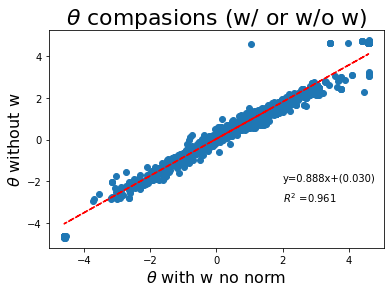

In [56]:
pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' " with w no norm", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " without w", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (w/ or w/o w)", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})